In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests, json

from sklearn.metrics import *
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 크롤링
from bs4 import BeautifulSoup
import openpyxl

# Linear, Logistic
from sklearn.linear_model import LinearRegression, LogisticRegression

# knn
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# decision
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# svm
from sklearn.svm import SVC, SVR

# bagging
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# boosting
from xgboost import XGBClassifier, XGBRegressor

In [41]:
test = pd.read_csv('test_dataset_v01.csv')
test.shape

(2441, 24)

In [42]:
test.loc[test['url_domain_len'].isna(), 'url_domain_len'] = test['url_hostname_len']

In [43]:
drop_col = ['url_chinese_present', "html_num_tags('applet')", 'Unnamed: 0', 'url_hostname_len']
test = test.drop(drop_col, axis=1)

In [44]:
test.isna().sum()

url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             101
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
dtype: int64

In [45]:
test["html_num_tags('form')"] = test["html_num_tags('form')"].fillna(1)

In [46]:
test['url_domain_len'] = test['url_domain_len'].fillna(29)

In [47]:
test["html_num_tags('a')"] = test["html_num_tags('a')"].fillna(test["html_num_tags('a')"].mean())

In [48]:
test['url_path_len'] = test['url_path_len'].fillna(test['url_path_len'].mean())

In [49]:
test["html_num_tags('script')"] = test["html_num_tags('script')"].fillna(test["html_num_tags('script')"].mean())

In [50]:
test.to_csv('test_val_2.csv', index=False)

In [51]:
import scipy.stats as spst

In [52]:
def plt_spst(x_, y_):
    sns.regplot(data=test, x=x_, y=y_)
    plt.show()
    # result = spst.pearsonr(test[x_], test[y_])
    # print(result)

In [53]:
test["html_num_tags('body')"].unique()

array([1, 3, 0, 2], dtype=int64)

In [54]:
test.loc[(test['url_query_len'] == 0) & (test['url_num_query_para'] == 0) & test["url_path_len"].isna()]
test.loc[(test['url_query_len'] == 0) & test["url_path_len"].isna()]
# test.loc[(test['url_query_len'] == 0) & test["url_path_len"].isna(), 'url_path_len'] = 33

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')


In [55]:
test['url_path_len'] = test['url_path_len'].fillna(27)

In [56]:
test.loc[(test['url_query_len'] == 0) & test["html_num_tags('script')"].isna()]
test.loc[(test['url_query_len'] == 0) & test["html_num_tags('script')"].isna(), "html_num_tags('script')"] = 17

In [57]:
test["html_num_tags('script')"] = test["html_num_tags('script')"].fillna(7)

In [58]:
test.loc[(test['url_query_len'] == 0) & test["html_num_tags('a')"].isna()]
test.loc[(test['url_query_len'] == 0) & test["html_num_tags('a')"].isna(), "html_num_tags('a')"] = 100

In [59]:
test["html_num_tags('a')"] = test["html_num_tags('a')"].fillna(18)

In [60]:
test.loc[(test['url_domain_len'] == 0) & test["url_domain_len"].isna()]
# test.loc[(test['url_domain_len'] == 0) & test["url_domain_len"].isna(), "url_domain_len"] = 100

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')


In [61]:
test.loc[(test['url_query_len'] == 0) & test["html_num_tags('form')"].isna()]
test.loc[(test['url_query_len'] == 0) & test["html_num_tags('form')"].isna(), "html_num_tags('form')"] = 2

In [62]:
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["url_path_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["url_path_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["html_num_tags('script')"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["html_num_tags('script')"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["html_num_tags('a')"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["html_num_tags('a')"].isna()]

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')


In [63]:
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["url_path_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["url_path_len"].isna(), "url_path_len"] = 37

In [64]:
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["url_path_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["url_path_len"].isna(), "url_path_len"] = 21

In [65]:
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["url_domain_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["url_domain_len"].isna(), "url_domain_len"] = 18

In [66]:
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["url_domain_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["url_domain_len"].isna(), "url_domain_len"] = 29

In [67]:
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["html_num_tags('script')"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["html_num_tags('script')"].isna(), "html_num_tags('script')"] = 17

In [68]:
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["html_num_tags('script')"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["html_num_tags('script')"].isna(), "html_num_tags('script')"] = 7

In [69]:
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["html_num_tags('a')"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["html_num_tags('a')"].isna(), "html_num_tags('a')"] = 100

In [70]:
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] <= 50) & test["html_num_tags('a')"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] <= 50) & test["html_num_tags('a')"].isna(), "html_num_tags('a')"] = 23

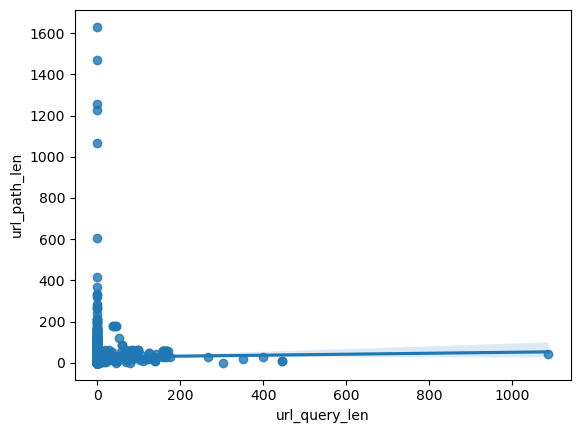

In [71]:
# 노선, 정류장 상관관계
sns.regplot(data=test, x='url_query_len', y="url_path_len")
plt.show()

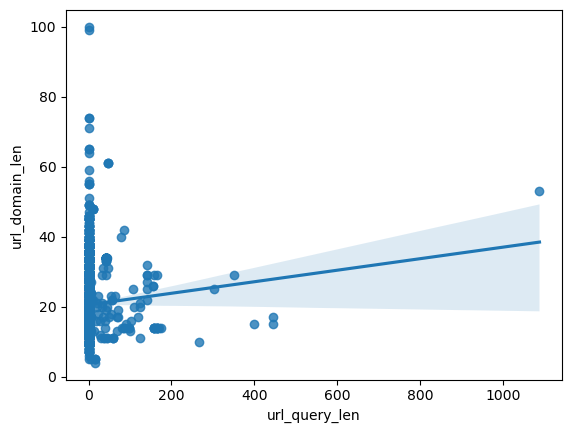

In [72]:
# 노선, 정류장 상관관계
sns.regplot(data=test, x='url_query_len', y="url_domain_len")
plt.show()

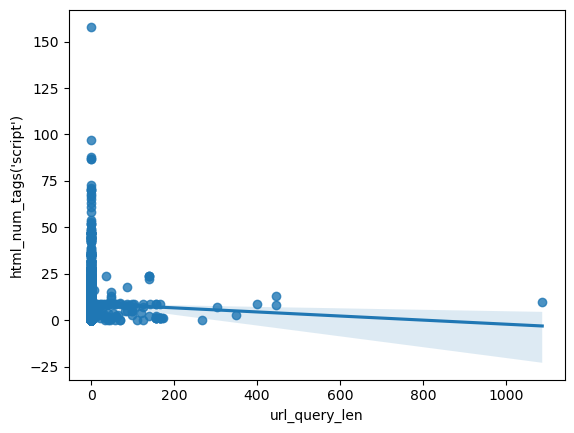

In [73]:
# 노선, 정류장 상관관계
sns.regplot(data=test, x='url_query_len', y="html_num_tags('script')")
plt.show()

In [74]:
test.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
dtype: int64

In [75]:
test["html_num_tags('form')"].unique()

array([ 1.,  0.,  3.,  4.,  2.,  5., 12., 19.,  6.,  7.])

In [76]:
test.shape

(2441, 20)

In [77]:
test

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
0,97,0,80.000000,17.0,4,0,0,0,0,4.844913,0,0,5.000000,0,0,12,1,1,1.0,3.000000
1,37,0,22.000000,15.0,3,1,0,0,0,4.246157,0,1,8.763931,0,0,158,1,1,1.0,66.969697
2,44,0,27.541772,20.0,3,3,0,0,0,4.612835,0,0,6.000000,3,3,34,1,1,0.0,136.000000
3,40,0,14.000000,26.0,2,0,0,0,0,4.238521,0,0,8.763931,0,0,29,1,1,1.0,2.000000
4,43,2,27.541772,26.0,2,0,0,0,0,4.240669,0,0,8.763931,0,0,41,1,1,1.0,66.969697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,63,0,27.541772,17.0,4,2,0,0,0,4.738082,0,1,18.000000,0,0,79,1,1,1.0,119.000000
2437,36,0,1.000000,35.0,2,0,0,0,0,4.080351,0,0,27.000000,0,0,57,1,1,1.0,66.969697
2438,45,1,23.000000,22.0,2,0,0,0,0,4.359443,0,0,8.000000,0,0,199,1,1,2.0,66.969697
2439,24,0,10.000000,14.0,3,0,0,0,1,4.260333,0,0,3.000000,0,0,90,1,1,2.0,25.000000


In [78]:
test.groupby(by="html_num_tags('form')")['url_len'].count()

html_num_tags('form')
0.0      643
1.0     1446
2.0      222
3.0       68
4.0       24
5.0       19
6.0        3
7.0       12
12.0       1
19.0       3
Name: url_len, dtype: int64

In [79]:
test.to_csv('test_val_4.csv', index=False)

In [80]:
data = pd.read_csv('train_dataset.csv')

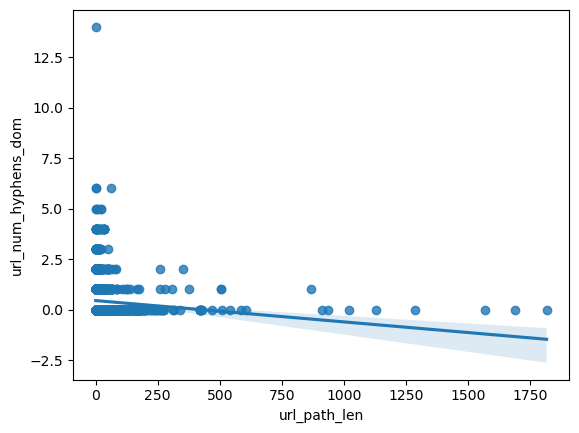

In [81]:
sns.regplot(data=data, y='url_num_hyphens_dom', x="url_path_len")
plt.show()

In [ ]:
test = pd.read_csv('test_dataset_v01.csv')
test.shape

In [ ]:
test.loc[test['url_domain_len'].isna(), 'url_domain_len'] = test['url_hostname_len']

In [ ]:
drop_col = ['url_chinese_present', "html_num_tags('applet')", 'Unnamed: 0', 'url_hostname_len']
test = test.drop(drop_col, axis=1)
test.isna().sum()

In [ ]:
test.loc[(test['url_num_hyphens_dom'] == 0) & (test["html_num_tags('div')"] >= 70) & test["url_path_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] == 0) & (test["html_num_tags('div')"] >= 70) & test["url_path_len"].isna(), "url_path_len"] = 37
test.loc[(test['url_num_hyphens_dom'] >= 2) & (test["html_num_tags('div')"] <= 40) & test["url_path_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 2) & (test["html_num_tags('div')"] <= 40) & test["url_path_len"].isna(), "url_path_len"] = 21
test.loc[(test['url_num_hyphens_dom'] == 0) & (test["html_num_tags('div')"] >= 70) & test["html_num_tags('script')"].isna()]
test.loc[(test['url_num_hyphens_dom'] == 0) & (test["html_num_tags('div')"] >= 70) & test["html_num_tags('script')"].isna(), "html_num_tags('script')"] = 17
test.loc[(test['url_num_hyphens_dom'] >= 2) & (test["html_num_tags('div')"] <= 40) & test["html_num_tags('script')"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 2) & (test["html_num_tags('div')"] <= 40) & test["html_num_tags('script')"].isna(), "html_num_tags('script')"] = 7
test.loc[(test['url_num_hyphens_dom'] == 0) & (test["html_num_tags('div')"] >= 70) & test["html_num_tags('a')"].isna()]
test.loc[(test['url_num_hyphens_dom'] == 0) & (test["html_num_tags('div')"] >= 70) & test["html_num_tags('a')"].isna(), "html_num_tags('a')"] = 100
test.loc[(test['url_num_hyphens_dom'] >= 2) & (test["html_num_tags('div')"] <= 40) & test["html_num_tags('a')"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 2) & (test["html_num_tags('div')"] <= 40) & test["html_num_tags('a')"].isna(), "html_num_tags('a')"] = 23
test["html_num_tags('form')"] = test["html_num_tags('form')"].fillna(1)


In [ ]:
test['url_path_len'] = test['url_path_len'].fillna(test['url_path_len'].mean())
test['url_domain_len'] = test['url_domain_len'].fillna(test['url_domain_len'].mean())
test["html_num_tags('a')"] = test["html_num_tags('a')"].fillna(test["html_num_tags('a')"].mean())
test["html_num_tags('script')"] = test["html_num_tags('script')"].fillna(test["html_num_tags('script')"].mean())

In [ ]:
data.loc[data['Result_v1'] == 1].describe()

In [ ]:
data.loc[data['Result_v1'] == 0].describe()

In [ ]:
test.describe()

In [ ]:
test.to_csv('test_val_1.csv', index=False)